In [1]:
# Extract LSOA and MSOA boundary files for the London Borough of LBTH.
# Based on the 2011 census boundaries for now, which is the most recent OA 
# boundary revision available. (This will change with the 2021 Census.)
#
# We also export two lookup tables:
# - a list of OAs (OA, MSOA, LSOA) & administrative regions (LAD) for LBTH
# - a mapping of OAs to Wards for LBTH

In [1]:
import os

import pandas as pd

In [2]:
import geopandas as gpd

Configuration
==


In [3]:
# Used as root folder.
project_dir = '..'

data_dir = f"{project_dir}/data"

# Used as output folder for all boundary files and centroid files.
oa_dir = f"{data_dir}/external/ons/boundaries"

# Used as output folder for all lookup tables.
lookup_dir = f"{data_dir}/external/ons/lookups"

In [4]:
# Clean. !! Use with caution !!
# !rm -rf "{oa_dir}"

In [5]:
!mkdir "{oa_dir}"
!mkdir "{lookup_dir}"

A subdirectory or file ../data/external/ons/boundaries already exists.


Downloads
==

Boundary downloads
--


please see https://data-hamlets.github.io/open-data-tower-hamlets/datasets/ons-2021-census-boundaries/

In [193]:
# OA
try:
  oa = gpd.read_file('../data/external/ons/boundaries/lbth_oa21_full.geojson')
except Exception:
  oa = gpd.read_file('https://gist.githubusercontent.com/joel-lbth/8afdafefe431f6e1508cf59993a5b0d8/raw/bc7ce874ab02e6ae8b4b418cf16eff6386cf34c3/lbth_oa21_full.geojson')
  oa.to_file('../data/external/ons/boundaries/lbth_oa21_full.geojson', driver='GeoJSON')

In [ ]:
# LSOA
try:
  lsoa = gpd.read_file('../data/external/ons/boundaries/lbth_lsoa21_full.geojson')
except Exception:
  lsoa = gpd.read_file('https://gist.github.com/joel-lbth/f2d748b99ee7bfe43384d1a80694038a/raw/5ea02c312cc712ca7e74c818148e7ed47e3e4c90/lbth_lsoa11_full.geojson')
  lsoa.to_file('../data/external/ons/boundaries/lbth_lsoa21_full.geojson', driver='GeoJSON')

In [ ]:
# MSOA
try:
  msoa = gpd.read_file('../data/external/ons/boundaries/lbth_msoa21_full.geojson')
except Exception:
  msoa = gpd.read_file('https://gist.githubusercontent.com/joel-lbth/8afdafefe431f6e1508cf59993a5b0d8/raw/bc7ce874ab02e6ae8b4b418cf16eff6386cf34c3/lbth_msoa21_full.geojson')
  msoa.to_file('../data/external/ons/boundaries/lbth_msoa21_full.geojson', driver='GeoJSON')

In [192]:
# WARDS
try:
  wards = gpd.read_file('../data/external/ons/boundaries/tower-hamlets-wards.geojson')
except Exception:
  wards = gpd.read_file('https://gist.github.com/joel-lbth/6d2c78c52163b7da1d91089c9bd849cf/raw/1ece7857aff95a3729d76313d63bd9cbb495491a/lbth-wards.geojson')
  wards.to_file('../data/external/ons/boundaries/tower-hamlets-wards.geojson', driver='GeoJSON')

Lookups
--

In [12]:
!rm "{lookup_dir}/"*

In [ ]:
# 2011 Admin lookup, from Dec 2020
# Source:
# https://geoportal.statistics.gov.uk/datasets/ons::output-area-to-lower-layer-super-output-area-to-middle-layer-super-output-area-to-local-authority-district-december-2020-lookup-in-england-and-wales/explore
!curl "https://opendata.arcgis.com/api/v3/datasets/65664b00231444edb3f6f83c9d40591f_0/downloads/data?format=csv&spatialRefId=4326&where=1%3D1" --output "{lookup_dir}/oa11_lsoa11_msoa11_lad20_rgn20.csv"

In [91]:
# 2021 Admin lookup
# Source:
# https://geoportal.statistics.gov.uk/datasets/output-area-to-lower-layer-super-output-area-to-middle-layer-super-output-area-to-local-authority-district-december-2021-lookup-in-england-and-wales-v2-1/about
# !curl "https://www.arcgis.com/sharing/rest/content/items/792f7ab3a99d403ca02cc9ca1cf8af02/data" --output "{lookup_dir}/oa21_lsoa21_msoa21_lad21.csv"

df = pd.read_csv("https://www.arcgis.com/sharing/rest/content/items/792f7ab3a99d403ca02cc9ca1cf8af02/data", encoding = 'latin')
df = df.query('lad22nm == "Tower Hamlets"')
df.drop(columns=['lad22cd',	'lad22nm', 'lad22nmw', 'msoa21nm', 'lsoa21nm'], inplace=True)
df.to_csv(f'{lookup_dir}/lbth_oa21_lsoa21_msoa21_lad21.csv', index=False)


C:\Users\joseph.leach\AppData\Local\Temp\ipykernel_26836\1728174070.py:6: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("https://www.arcgis.com/sharing/rest/content/items/792f7ab3a99d403ca02cc9ca1cf8af02/data", encoding = 'latin')


In [92]:
lbth_oa21_lsoa21_msoa21_lad21 = df

In [ ]:
# https://www.arcgis.com/sharing/rest/content/items/5fc4ff82228846c2b893e3beba0e3751/data

# Best-Fit Lookup
# A best-fit lookup file between Lower layer Super Output Areas (LSOA) as at December 2011 and LSOAs as at December 2021 in England and Wales.
# The lookup contains all the 2011 LSOAs (34,753) and these are point-in-polygon to the 2021 LSOA full extent boundaries (which contains 34,628 records, so 1,044 LSOAs are missing from the 2021 LSOAs)

!curl "https://www.arcgis.com/sharing/rest/content/items/5fc4ff82228846c2b893e3beba0e3751/data" --output "{lookup_dir}/LSOA2011-to-LSOA-2021-to-Local-Authority-District-2022.csv"

Centroid downloads
--

these are used to map census areas to ward

In [103]:
# OA population-weighted centroids, 2021 census boundaries
# Source: 
# https://geoportal.statistics.gov.uk/search?collection=Dataset&sort=name&tags=all(CTD_OA)
gdf = gpd.read_file("https://opendata.arcgis.com/api/v3/datasets/d966943bc42b4efb8bd9233016163379_0/downloads/data?format=geojson&spatialRefId=4326&where=1%3D1")


In [107]:
oa_centroids = gdf
oa_centroids = oa_centroids.drop(columns=['FID','GlobalID'])
oa_centroids = oa_centroids.merge(lbth_oa21_lsoa21_msoa21_lad21, left_on='OA21CD', right_on='oa21cd')
oa_centroids = oa_centroids.drop(columns=['oa21cd','lsoa21cd','msoa21cd'])

In [202]:
oa_centroids.head()

,OA21CD,geometry
0,E00021642,POINT (-0.05250 51.51119)
1,E00021147,POINT (-0.04933 51.53119)
2,E00167131,POINT (-0.02269 51.49700)
3,E00021156,POINT (-0.05635 51.52995)
4,E00021591,POINT (-0.04361 51.51513)


In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1, figsize=(12, 9), dpi=150, facecolor="w")
# plt.suptitle('OA centroids', fontsize=16, y=0.95,x=0.45)
plt.title('OA centroids weighted by population', fontsize=12,y=1.05,x=0.55)
oa.plot(ax=ax, legend=True,edgecolor='black', facecolor='none').axis("off")
oa_centroids.plot(ax=ax, legend=True, color='none',edgecolor='blue').axis("off")
wards.plot(ax=ax, legend=True,edgecolor='red', facecolor='none').axis("off")

c:\Users\joseph.leach\code\Anaconda3\envs\census-data\lib\site-packages\geopandas\base.py:31: UserWarning: The indices of the two GeoSeries are different.
  warn("The indices of the two GeoSeries are different.")
c:\Users\joseph.leach\code\Anaconda3\envs\census-data\lib\site-packages\geopandas\base.py:31: UserWarning: The indices of the two GeoSeries are different.
  warn("The indices of the two GeoSeries are different.")


<AxesSubplot:>

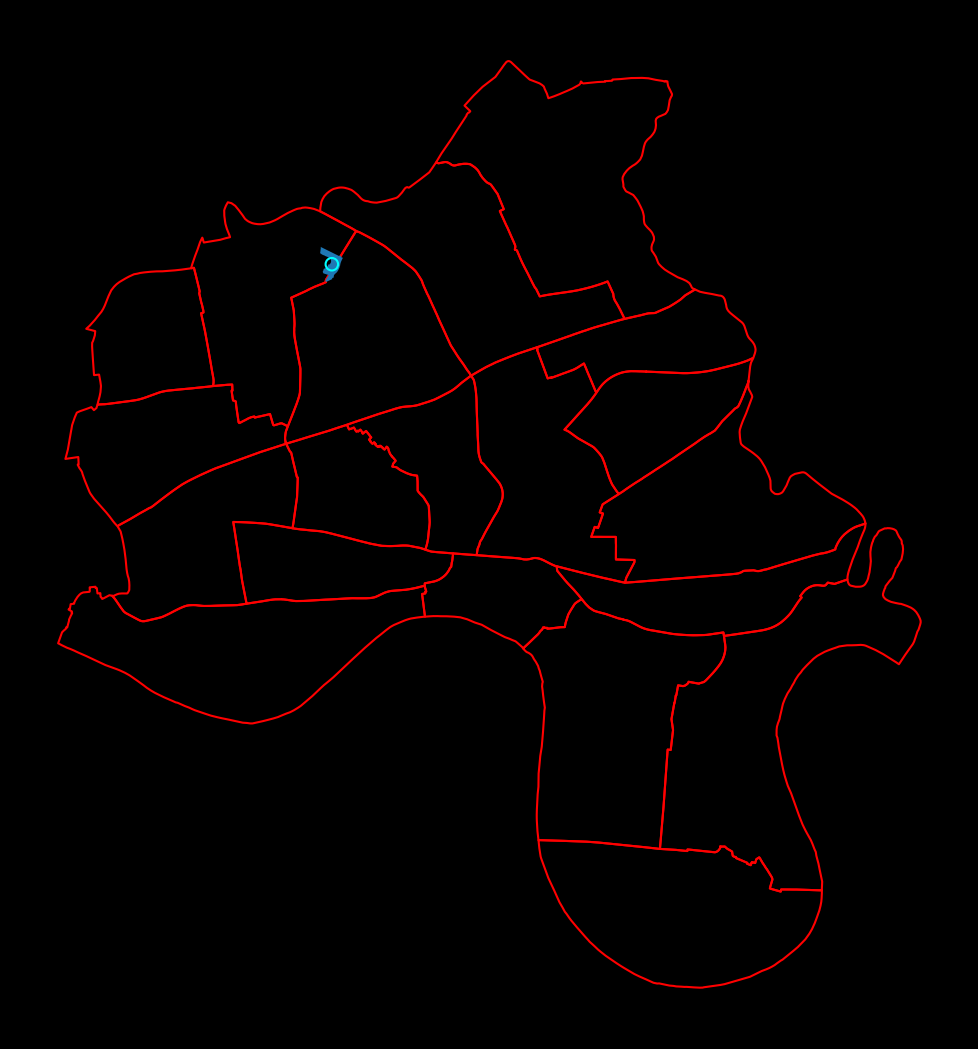

In [220]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1, figsize=(12, 9), dpi=150, facecolor="black")
# plt.suptitle('OA centroids', fontsize=16, y=0.95,x=0.45)
# plt.title('OA centroids weighted by population', fontsize=12,y=1.05,x=0.55)
wards.plot(ax=ax, legend=True, edgecolor='red', facecolor='none').axis("off")
oa.loc[oa.overlaps(wards)].plot(ax=ax)
oa_centroids[oa_centroids.OA21CD == oa[oa.overlaps(wards)].OA21CD.values[0]].plot(ax=ax, color='none', edgecolor='cyan')


Match oa to wards by centroid
--

In [110]:
df = oa_centroids.sjoin(wards, how='left').drop(columns=['index_right', 'geometry'])
df.rename(columns = {'NAME':'ward_name'}, inplace=True)
df.to_csv('../data/external/ons/lookups/lbth_oa21_ward_lookup.csv', index=False)
df.head()

,OA21CD,ward_name
0,E00021642,Shadwell
1,E00021147,Bethnal Green East
2,E00167131,Canary Wharf
3,E00021156,Bethnal Green West
4,E00021591,Stepney Green
